<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Committor-probabilities" data-toc-modified-id="Committor-probabilities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Committor probabilities</a></span><ul class="toc-item"><li><span><a href="#Generate-initial-conditions-on-the-slice" data-toc-modified-id="Generate-initial-conditions-on-the-slice-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generate initial conditions on the slice</a></span></li><li><span><a href="#Parameter-set:-fig.3B2" data-toc-modified-id="Parameter-set:-fig.3B2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parameter set: fig.3B2</a></span><ul class="toc-item"><li><span><a href="#Visualizing-the-reactive-islands,-the-energy-boundary,-and-the-initial-conditions" data-toc-modified-id="Visualizing-the-reactive-islands,-the-energy-boundary,-and-the-initial-conditions-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Visualizing the reactive islands, the energy boundary, and the initial conditions</a></span></li></ul></li><li><span><a href="#Parameter-set:-fig.3C2" data-toc-modified-id="Parameter-set:-fig.3C2-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Parameter set: fig.3C2</a></span><ul class="toc-item"><li><span><a href="#Visualizing-the-reactive-islands,-the-energy-boundary,-and-the-initial-conditions" data-toc-modified-id="Visualizing-the-reactive-islands,-the-energy-boundary,-and-the-initial-conditions-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Visualizing the reactive islands, the energy boundary, and the initial conditions</a></span></li></ul></li><li><span><a href="#Parameter-set:-fig.3C2" data-toc-modified-id="Parameter-set:-fig.3C2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Parameter set: fig.3C2</a></span><ul class="toc-item"><li><span><a href="#Visualizing-the-reactive-islands,-the-energy-boundary,-and-the-initial-conditions" data-toc-modified-id="Visualizing-the-reactive-islands,-the-energy-boundary,-and-the-initial-conditions-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Visualizing the reactive islands, the energy boundary, and the initial conditions</a></span></li></ul></li><li><span><a href="#Visualizing-the-committor-probabilities" data-toc-modified-id="Visualizing-the-committor-probabilities-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Visualizing the committor probabilities</a></span><ul class="toc-item"><li><span><a href="#References:" data-toc-modified-id="References:-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>References:</a></span></li></ul></li></ul></li></ul></div>

# Committor probabilities

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.lines as lines


from pylab import rcParams
mpl.rcParams['mathtext.fontset'] = 'cm'
# mpl.rcParams['mathtext.rm'] = 'serif'

rcParams['figure.figsize'] = 7, 7

label_size = 30
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['axes.labelsize'] = 30

# plt.style.use('seaborn') # use sans-serif fonts

mpl.rcParams['axes.spines.left'] = True   ## display axis spines
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['ytick.major.width'] = 1.0


#mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['font.weight'] = 'normal'

import DeLeonBerne2dof
import importlib
importlib.reload(DeLeonBerne2dof)
import DeLeonBerne2dof as DB2dof



## Generate initial conditions on the slice 

$(x,p_x)$ with $y = y_w$ and $\dot{y} < 0$


In [2]:


import scipy as sp
from scipy.optimize import fsolve


def get_xbounds_xpx_pxConst(x, *args):
    """
    function to solve minimum and maximum value of x-coordinate on the 
    surface (x,px) with y = yw, px = constant, py = 0
    """

    Eval, pxval, massA, massB, EPSILON, Dx, ALPHA, LAMBDA = args[0:]
    
    H = lambda x: ( pxval**2/(2.0*massA) + \
                   Dx*(1 - np.exp(-LAMBDA*x))**2 - np.exp(-ALPHA*LAMBDA*x) + EPSILON )
    
    return (Eval - H(x))

def get_microcanon_initconds_xpx(params, deltaEnergy, xConstant, pxConstant, num_initconds):
    """
    Obtain microcanonical initial conditions on the (x,px) surface in 4D 
    phase space with either x-coordinate or px-coordinate kept constant
    """
    YW = 1/np.sqrt(2)
    
    massA, massB, EPSILON, Dx, ALPHA, LAMBDA = params
    saddleEnergy = EPSILON
    totalEnergy = saddleEnergy + deltaEnergy
    
    initconds = np.zeros((num_initconds, 4))
    initconds[:,1] = YW*np.ones((num_initconds))
    
    if np.isnan(pxConstant): 
        pxMax =  np.sqrt( 2.0*massA*(totalEnergy - (DB2dof.V_DB(xConstant, YW, params[2:]))) )

    #     print(-pxMax, pxMax)

        initconds[:,0] = xConstant*np.ones((num_initconds))
        initconds[:,2] = np.linspace(-pxMax - np.sign(-pxMax)*1e-6, pxMax - np.sign(pxMax)*1e-6, \
                                     num_initconds, endpoint=True)


        initconds[:,3] = -np.sqrt( 2.0*massB*(totalEnergy - \
                                  (DB2dof.V_DB(xConstant, YW, params[2:]) + \
                                  (1/(2.0*massA))*initconds[:,2]**2)))
        
    elif np.isnan(xConstant):
        args = totalEnergy, pxConstant, massA, massB, EPSILON, Dx, ALPHA, LAMBDA 
        initconds[:,2] = pxConstant*np.ones((num_initconds))
        
        # compute the maximum and minimum of the x-bounds on the section (x,px)
        xMin = fsolve(get_xbounds_xpx_pxConst,  -1, \
                      args = args)
        xMax = fsolve(get_xbounds_xpx_pxConst,  1, \
                      args = args)
        
#         print(xMin - np.sign(xMin)*1e-10, xMax - np.sign(xMax)*1e-10) 
        
        initconds[:,0] = np.linspace(xMin - np.sign(xMin)*1e-6, xMax - np.sign(xMax)*1e-6, \
                                     num_initconds, endpoint = True) # tolerance near the boundary
        
        for i in range(num_initconds):
            initconds[i,3] = -np.sqrt( 2.0*massB*(totalEnergy - \
                                      (DB2dof.V_DB(initconds[i,0], YW, params[2:]) + \
                                      (1/(2.0*massA))*initconds[i,2]**2)))
#             print(initconds[i,3])
        
        
#     print(initconds)
    
    return initconds




## Parameter set: fig.3B2 

In [3]:

params = DB2dof.set_parameters('fig3B2/')
print(params)

# deltaEnergy = 5.000
deltaEnergy = 0.500
num_initconds = 500
# get_microcanon_initconds_xpx(params, deltaEnergy, xConstant, num_initconds)
initconds_set1 = get_microcanon_initconds_xpx(params, deltaEnergy, 0.2, np.NAN, num_initconds)

initconds_set2 = get_microcanon_initconds_xpx(params, deltaEnergy, 0.15, np.NAN, num_initconds)

initconds_set3 = get_microcanon_initconds_xpx(params, deltaEnergy, 0.1, np.NAN, num_initconds)

initconds_set4 = get_microcanon_initconds_xpx(params, deltaEnergy, 0.0, np.NAN, num_initconds)

initconds_set5 = get_microcanon_initconds_xpx(params, deltaEnergy, -0.15, np.NAN, num_initconds)

np.savetxt('initconds_set1.txt',initconds_set1)
np.savetxt('initconds_set2.txt',initconds_set2)
np.savetxt('initconds_set3.txt',initconds_set3)
np.savetxt('initconds_set4.txt',initconds_set4)
np.savetxt('initconds_set5.txt',initconds_set5)


[8, 8, 1.0, 10.0, 1.0, 1.5]


### Visualizing the reactive islands, the energy boundary, and the initial conditions

In [4]:

%matplotlib

import seaborn as sns
# print(tube_intersect_area)

# plt.style.use('default')
plt.style.use('seaborn')
# mpl.rcParams['mathtext.fontset'] = 'cm'
sns.set_style("ticks")
# mpl.rcParams['font.family'] = 'Helvetica'
# mpl.rcParams['mathtext.rm'] = 'serif'


ls_tick = 20
ls_axes = 30
mpl.rcParams['xtick.labelsize'] = ls_tick
mpl.rcParams['ytick.labelsize'] = ls_tick
mpl.rcParams['axes.labelsize'] = ls_axes



smani_data_path = '/Users/OptimusPrime/Documents/reaction-dynamics/system-bath/' + \
        'data-figures/DeLeon-Berne/reaction-fraction/stable-mani-top-well/'

unmani_data_path = '/Users/OptimusPrime/Documents/reaction-dynamics/system-bath/' + \
        'data-figures/DeLeon-Berne/reaction-fraction/unstable-mani-top-well/'

zeta_lambda_comb = ['ZETA0.00-LAMBDA1.00/','fig3A1/','fig3A2/',\
                    'fig3B1/','fig3B2/','fig3C1/','fig3C2/']
k = 4

printFlag = False
energy_boundary = DB2dof.get_energybndry_intersect_sos(params, deltaEnergy, printFlag)


# Loading the stable manifold's intersection
if (float(deltaEnergy) - int(deltaEnergy) < 1e-12):    
    stable_mani = np.loadtxt(smani_data_path + zeta_lambda_comb[k] + \
                      'xeU1_stable_branch1_eqPt1_DelE%.0f'%(deltaEnergy) + \
                      '_deleonberne.txt')
    
else:
    try:
        stable_mani = np.loadtxt(smani_data_path + zeta_lambda_comb[k] + \
                          'xeU1_stable_branch1_eqPt1_DelE%.2f'%(deltaEnergy) + \
                          '_deleonberne.txt')        
    except:
        stable_mani = np.loadtxt(smani_data_path + zeta_lambda_comb[k] + \
                          'xeU1_stable_branch1_eqPt1_DelE%.1f'%(deltaEnergy) + \
                          '_deleonberne.txt')

# Loading the unstable manifold's intersection
if (float(deltaEnergy) - int(deltaEnergy) < 1e-12): 
    unstable_mani = np.loadtxt(unmani_data_path + zeta_lambda_comb[k] + \
                      'xeU1_unstable_branch1_eqPt1_DelE%.0f'%(deltaEnergy) + \
                      '_deleonberne.txt')
else:
    try:
        unstable_mani = np.loadtxt(unmani_data_path + zeta_lambda_comb[k] + \
                      'xeU1_unstable_branch1_eqPt1_DelE%.2f'%(deltaEnergy) + \
                      '_deleonberne.txt')
        
    except:
        unstable_mani = np.loadtxt(unmani_data_path + zeta_lambda_comb[k] + \
                      'xeU1_unstable_branch1_eqPt1_DelE%.1f'%(deltaEnergy) + \
                      '_deleonberne.txt')
        
plt.close('all')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
plt.plot(energy_boundary[:,0], energy_boundary[:,1],'-m')
plt.plot(stable_mani[:,0], stable_mani[:,2], '-g')
plt.plot(unstable_mani[:,0], unstable_mani[:,2], '-r')

plt.plot(initconds_set1[:,0], initconds_set1[:,2], '-k')
plt.plot(initconds_set2[:,0], initconds_set2[:,2], '-k')
plt.plot(initconds_set3[:,0], initconds_set3[:,2], '-k')
plt.plot(initconds_set4[:,0], initconds_set4[:,2], '-k')
plt.plot(initconds_set5[:,0], initconds_set5[:,2], '-k')

plt.plot(initconds_set1[0,0], max(initconds_set1[:,2]) + 0.3, '^r', markersize = 10)
plt.plot(initconds_set2[0,0], max(initconds_set2[:,2]) + 0.3, 'oc', markersize = 10)
plt.plot(initconds_set3[0,0], max(initconds_set3[:,2]) + 0.3, 'sm', markersize = 10)
plt.plot(initconds_set4[0,0], max(initconds_set4[:,2]) + 0.3, '<g', markersize = 10)
plt.plot(initconds_set5[0,0], max(initconds_set5[:,2]) + 0.3, '>b', markersize = 10)

print(np.max(energy_boundary[:,0]),np.min(energy_boundary[:,0]))
print(np.max(energy_boundary[:,1]),np.min(energy_boundary[:,1]))

ax.set_xlabel(r'$x$', fontsize = ls_axes)
ax.set_ylabel(r'$p_x$', fontsize = ls_axes)

# fig.savefig('mc_initconds_xpx_xConstant_fig3B2_' +  
#             'DelE%.1f'%(deltaEnergy) + '.pdf', bbox_inches = 'tight')
plt.show()





Using matplotlib backend: MacOSX
0.27752815745708626 -0.24333262786538595
4.939634487238545 -4.939634487238545


## Parameter set: fig.3C2 

In [48]:

params = DB2dof.set_parameters('fig3C2/')
print(params)
deltaEnergy = 0.5
num_initconds = 50

# get_microcanon_initconds_xpx(params, deltaEnergy, xConstant, num_initconds)
initconds_set1 = get_microcanon_initconds_xpx(params, deltaEnergy, np.NAN, 4, num_initconds)

initconds_set2 = get_microcanon_initconds_xpx(params, deltaEnergy, np.NAN, 2, num_initconds)

initconds_set3 = get_microcanon_initconds_xpx(params, deltaEnergy, np.NAN, 0, num_initconds)

initconds_set4 = get_microcanon_initconds_xpx(params, deltaEnergy, np.NAN, -1, num_initconds)

initconds_set5 = get_microcanon_initconds_xpx(params, deltaEnergy, np.NAN, -4, num_initconds)


np.savetxt('initconds_set1.txt',initconds_set1)
np.savetxt('initconds_set2.txt',initconds_set2)
np.savetxt('initconds_set3.txt',initconds_set3)
np.savetxt('initconds_set4.txt',initconds_set4)
np.savetxt('initconds_set5.txt',initconds_set5)

[8, 8, 1.0, 10.0, 2.3, 1.95]


### Visualizing the reactive islands, the energy boundary, and the initial conditions

In [49]:
%matplotlib
# print(tube_intersect_area)

# plt.style.use('default')
# mpl.rcParams['mathtext.fontset'] = 'cm'
# mpl.rcParams['mathtext.rm'] = 'serif'


ls_tick = 20
ls_axes = 30
mpl.rcParams['xtick.labelsize'] = ls_tick
mpl.rcParams['ytick.labelsize'] = ls_tick
mpl.rcParams['axes.labelsize'] = ls_axes



smani_data_path = '/Users/OptimusPrime/Documents/reaction-dynamics/system-bath/' + \
        'data-figures/DeLeon-Berne/reaction-fraction/stable-mani-top-well/'

unmani_data_path = '/Users/OptimusPrime/Documents/reaction-dynamics/system-bath/' + \
        'data-figures/DeLeon-Berne/reaction-fraction/unstable-mani-top-well/'

zeta_lambda_comb = ['ZETA0.00-LAMBDA1.00/','fig3A1/','fig3A2/',\
                    'fig3B1/','fig3B2/','fig3C1/','fig3C2/']
k = 6


deltaEnergy = 0.5
printFlag = False
energy_boundary = DB2dof.get_energybndry_intersect_sos(params, deltaEnergy, printFlag)


# Loading the stable manifold's intersection
if (float(deltaEnergy) - int(deltaEnergy) < 1e-12):    
    stable_mani = np.loadtxt(smani_data_path + zeta_lambda_comb[k] + \
                      'xeU1_stable_branch1_eqPt1_DelE%.0f'%(deltaEnergy) + \
                      '_deleonberne.txt')
    
else:
    try:
        stable_mani = np.loadtxt(smani_data_path + zeta_lambda_comb[k] + \
                          'xeU1_stable_branch1_eqPt1_DelE%.2f'%(deltaEnergy) + \
                          '_deleonberne.txt')        
    except:
        stable_mani = np.loadtxt(smani_data_path + zeta_lambda_comb[k] + \
                          'xeU1_stable_branch1_eqPt1_DelE%.1f'%(deltaEnergy) + \
                          '_deleonberne.txt')

# Loading the unstable manifold's intersection
if (float(deltaEnergy) - int(deltaEnergy) < 1e-12): 
    unstable_mani = np.loadtxt(unmani_data_path + zeta_lambda_comb[k] + \
                      'xeU1_unstable_branch1_eqPt1_DelE%.0f'%(deltaEnergy) + \
                      '_deleonberne.txt')
else:
    try:
        unstable_mani = np.loadtxt(unmani_data_path + zeta_lambda_comb[k] + \
                      'xeU1_unstable_branch1_eqPt1_DelE%.2f'%(deltaEnergy) + \
                      '_deleonberne.txt')
        
    except:
        unstable_mani = np.loadtxt(unmani_data_path + zeta_lambda_comb[k] + \
                      'xeU1_unstable_branch1_eqPt1_DelE%.1f'%(deltaEnergy) + \
                      '_deleonberne.txt')
        
plt.close('all')
fig = plt.figure(figsize = (7,7))
ax = fig.gca()
plt.plot(energy_boundary[:,0], energy_boundary[:,1],'-m')
plt.plot(stable_mani[:,0], stable_mani[:,2], '-g')
plt.plot(unstable_mani[:,0], unstable_mani[:,2], '-r')

plt.plot(initconds_set1[:,0], initconds_set1[:,2], '-k')
plt.plot(initconds_set2[:,0], initconds_set2[:,2], '-k')
plt.plot(initconds_set3[:,0], initconds_set3[:,2], '-k')
plt.plot(initconds_set4[:,0], initconds_set4[:,2], '-k')
plt.plot(initconds_set5[:,0], initconds_set5[:,2], '-k')

plt.plot(max(initconds_set1[:,0]) + 0.02, initconds_set1[0,2], '^r', markersize = 10)
plt.plot(max(initconds_set2[:,0]) + 0.02, initconds_set2[0,2], 'oc', markersize = 10)
plt.plot(max(initconds_set3[:,0]) + 0.02, initconds_set3[0,2], 'sm', markersize = 10)
plt.plot(max(initconds_set4[:,0]) + 0.02, initconds_set4[0,2], '<g', markersize = 10)
plt.plot(max(initconds_set1[:,0]) + 0.02, initconds_set5[0,2], '>b', markersize = 10)

print(np.max(energy_boundary[:,0]),np.min(energy_boundary[:,0]))
print(np.max(energy_boundary[:,1]),np.min(energy_boundary[:,1]))

ax.set_xlabel(r'$x$', fontsize = ls_axes)
ax.set_ylabel(r'$p_x$', fontsize = ls_axes)

# fig.savefig('mc_initconds_xpx_pxConstant_fig3C2_' +  
#             'DelE%.1f'%(deltaEnergy) + '.pdf', bbox_inches = 'tight')
plt.show()


Using matplotlib backend: MacOSX
0.1868632270889181 -0.23455906977757454
5.147207277423671 -5.147207277423671


## Parameter set: fig.3C2 

In [68]:

params = DB2dof.set_parameters('fig3C2/')
print(params)
# deltaEnergy = 5.000
deltaEnergy = 0.5
num_initconds = 500

# get_microcanon_initconds_xpx(params, deltaEnergy, xConstant, num_initconds)
initconds_set1 = get_microcanon_initconds_xpx(params, deltaEnergy, 0.05, np.NAN, num_initconds)

initconds_set2 = get_microcanon_initconds_xpx(params, deltaEnergy, 0.1, np.NAN, num_initconds)

initconds_set3 = get_microcanon_initconds_xpx(params, deltaEnergy, 0.0, np.NAN, num_initconds)

initconds_set4 = get_microcanon_initconds_xpx(params, deltaEnergy, -0.1, np.NAN, num_initconds)

initconds_set5 = get_microcanon_initconds_xpx(params, deltaEnergy, -0.15, np.NAN, num_initconds)

np.savetxt('initconds_set1.txt',initconds_set1)
np.savetxt('initconds_set2.txt',initconds_set2)
np.savetxt('initconds_set3.txt',initconds_set3)
np.savetxt('initconds_set4.txt',initconds_set4)
np.savetxt('initconds_set5.txt',initconds_set5)

[8, 8, 1.0, 10.0, 2.3, 1.95]


### Visualizing the reactive islands, the energy boundary, and the initial conditions

In [69]:
%matplotlib
# print(tube_intersect_area)

# plt.style.use('default')
# mpl.rcParams['mathtext.fontset'] = 'cm'
# mpl.rcParams['mathtext.rm'] = 'sans-serif'


ls_tick = 20
ls_axes = 30
mpl.rcParams['xtick.labelsize'] = ls_tick
mpl.rcParams['ytick.labelsize'] = ls_tick
mpl.rcParams['axes.labelsize'] = ls_axes



smani_data_path = '/Users/OptimusPrime/Documents/reaction-dynamics/system-bath/' + \
        'data-figures/DeLeon-Berne/reaction-fraction/stable-mani-top-well/'

unmani_data_path = '/Users/OptimusPrime/Documents/reaction-dynamics/system-bath/' + \
        'data-figures/DeLeon-Berne/reaction-fraction/unstable-mani-top-well/'

zeta_lambda_comb = ['ZETA0.00-LAMBDA1.00/','fig3A1/','fig3A2/',\
                    'fig3B1/','fig3B2/','fig3C1/','fig3C2/']
k = 6


deltaEnergy = 0.5
printFlag = False
energy_boundary = DB2dof.get_energybndry_intersect_sos(params, deltaEnergy, printFlag)


# Loading the stable manifold's intersection
if (float(deltaEnergy) - int(deltaEnergy) < 1e-12):    
    stable_mani = np.loadtxt(smani_data_path + zeta_lambda_comb[k] + \
                      'xeU1_stable_branch1_eqPt1_DelE%.0f'%(deltaEnergy) + \
                      '_deleonberne.txt')
    
else:
    try:
        stable_mani = np.loadtxt(smani_data_path + zeta_lambda_comb[k] + \
                          'xeU1_stable_branch1_eqPt1_DelE%.2f'%(deltaEnergy) + \
                          '_deleonberne.txt')        
    except:
        stable_mani = np.loadtxt(smani_data_path + zeta_lambda_comb[k] + \
                          'xeU1_stable_branch1_eqPt1_DelE%.1f'%(deltaEnergy) + \
                          '_deleonberne.txt')

# Loading the unstable manifold's intersection
if (float(deltaEnergy) - int(deltaEnergy) < 1e-12): 
    unstable_mani = np.loadtxt(unmani_data_path + zeta_lambda_comb[k] + \
                      'xeU1_unstable_branch1_eqPt1_DelE%.0f'%(deltaEnergy) + \
                      '_deleonberne.txt')
else:
    try:
        unstable_mani = np.loadtxt(unmani_data_path + zeta_lambda_comb[k] + \
                      'xeU1_unstable_branch1_eqPt1_DelE%.2f'%(deltaEnergy) + \
                      '_deleonberne.txt')
        
    except:
        unstable_mani = np.loadtxt(unmani_data_path + zeta_lambda_comb[k] + \
                      'xeU1_unstable_branch1_eqPt1_DelE%.1f'%(deltaEnergy) + \
                      '_deleonberne.txt')
        
# plt.close('all')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
plt.plot(energy_boundary[:,0], energy_boundary[:,1],'-m')
plt.plot(stable_mani[:,0], stable_mani[:,2], '-g')
plt.plot(unstable_mani[:,0], unstable_mani[:,2], '-r')

plt.plot(initconds_set1[:,0], initconds_set1[:,2], '-k')
plt.plot(initconds_set2[:,0], initconds_set2[:,2], '-k')
plt.plot(initconds_set3[:,0], initconds_set3[:,2], '-k')
plt.plot(initconds_set4[:,0], initconds_set4[:,2], '-k')
plt.plot(initconds_set5[:,0], initconds_set5[:,2], '-k')

plt.plot(initconds_set1[0,0], max(initconds_set1[:,2]) + 0.3, '^r', markersize = 10)
plt.plot(initconds_set2[0,0], max(initconds_set2[:,2]) + 0.3, 'oc', markersize = 10)
plt.plot(initconds_set3[0,0], max(initconds_set3[:,2]) + 0.3, 'sm', markersize = 10)
plt.plot(initconds_set4[0,0], max(initconds_set4[:,2]) + 0.3, '<g', markersize = 10)
plt.plot(initconds_set5[0,0], max(initconds_set5[:,2]) + 0.3, '>b', markersize = 10)



print(np.max(energy_boundary[:,0]),np.min(energy_boundary[:,0]))
print(np.max(energy_boundary[:,1]),np.min(energy_boundary[:,1]))

ax.set_xlabel(r'$x$', fontsize = ls_axes)
ax.set_ylabel(r'$p_x$', fontsize = ls_axes)

# fig.savefig('mc_initconds_xpx_xConstant_fig3C2_' +  
#             'DelE%.1f'%(deltaEnergy) + '.pdf', bbox_inches = 'tight')
plt.show()


Using matplotlib backend: MacOSX
0.1868632270889181 -0.23455906977757454
5.147207277423671 -5.147207277423671


In [70]:
plt.close('all')

## Visualizing the committor probabilities

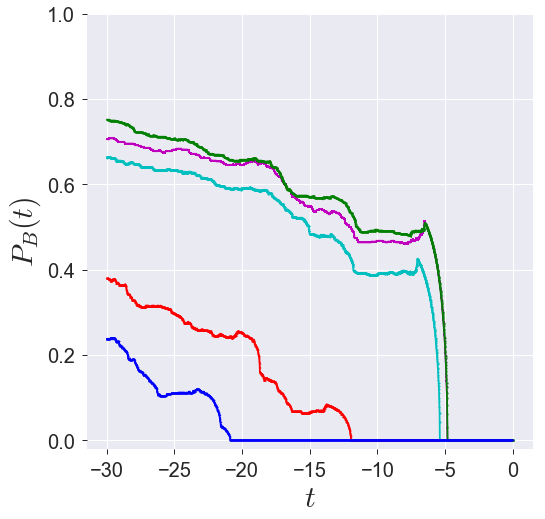

In [6]:

# commit_ts = characteristic_isomerB(sol)
# plt.plot(t_eval, np.cumsum(np.sum(commit_ts,axis = 1))/len(commit_ts[:,0]),\
#         '^r',markersize = 1)

data_path = './fig3B2/backward/'
# data_path = './'
filename = 'commit_prob_fig3B2_500_30finalt.pdf'
num_config = 5
num_initconds = 500
markertype = ['-^r','-oc','-sm','-<g','->b']
length_ts = 3000

plt.style.use('seaborn') # use sans-serif fonts
# plt.style.use('default')

label_size = 20 #10, 20
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['axes.labelsize'] = 30 #, 15
# mpl.rcParams['mathtext.fontset'] = 'cm'
# mpl.rcParams['mathtext.rm'] = 'serif'


mpl.rcParams['axes.spines.left'] = True   ## display axis spines
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['ytick.major.width'] = 1.0




fig_cp = plt.figure(figsize=(8,8))
ax_cp  = fig_cp.gca()

for i in range(num_config):
    
    commit_ts = np.loadtxt(data_path + 'commit_prob_' + str(num_initconds) + \
                           'icset' + str(i+1) + '.txt')
    ax_cp.plot(commit_ts[:length_ts,0], commit_ts[:length_ts,1]/num_initconds, \
               markertype[i], markersize = 2)


ax_cp.set_ylim([-0.02, 1.0])
ax_cp.set_xlabel(r'$t$')
ax_cp.set_ylabel(r'$P_B(t)$')
plt.savefig(data_path + filename,bbox_inches='tight')

plt.show()


In [42]:
# %timeit DB2dof.set_parameters('fig3C2/')
# params = DB2dof.set_parameters('fig3C2/')
# timeit.timeit(DB2dof.set_parameters(), number = 1)


### References:

[Seaborn](https://seaborn.pydata.org/tutorial/aesthetics.html)